##JesseRuiz_Codeup_RegressionProject_2019


<h1>Zillow Zestimate Prediction</h1>

<h1>Project Planning</h1> 

<ol><li> <h4>Goal:</h4> To create a linear regression model to predict house sales price </li>
    <li> <h4>Deliverables:</h4> A report that tells the story of the Zestimate error and Jupyter notebook with the analysis </li>
    <li><h4>Data Dictionary</h4>
        <ul>Number of bathrooms</ul>
        <ul>Number of bedrooms</ul>
        <ul>Finished Square Footage</ul>
        <ul>Number of full bathrooms</ul>
        <ul>Garage size</ul>
        <ul>Rooms</ul>
        <ul>Year built</ul>
        <ul>Tax value dollar amount = Price of Home (assessed tax amount)</ul>
        <ul>Tax amount = Amount tax paid</ul>
         <ul>Parcelid = unique lot number of each property</ul>
        <ul>logerror = log of residuals</ul>
        <ul>Transaction date = Date of sale</ul>
        <ul>Lat/Long = the location latitude and longitude</ul>
        <ul>'regionidcounty' = County in which the property is located</ul>
        <ul>'regionidcity' = City in which the property is located (if any)</ul>
        <ul>'regionidzip' = Zip code in which the property is located</ul>
        <ul>'regionidneighborhood' = Neighborhood in which the property is located!</ul>
    <li><h4>Brainstorming Ideas:</h4>
        <ul>The Overall Size of the Home = # Bedrooms + Square footage + Full baths</ul>
        <ul>Location Location Location; Examine all the location variables</ul>
        <ul>Drop variable Number of bathrooms or Number of full bathrooms (Redundant)</ul>
        <ul>Examine variables related to price including tax; relate taxes to the counties where the homeowner is taxed</ul>
        <ul></ul>
        <ul></ul>
       

<h2>Prep Environment</h2>

In [45]:
import numpy as np
import pandas as pd

from numpy.random import randn



# Modeling
import statsmodels.api as sm
import scipy.stats as stats

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
mpl.style.use('classic')
%matplotlib inline

import math

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import statsmodels.api as sm

from pprint import pprint

<h1>Data Acquisition</h1>
    <p>
        <ol>
            <li>Get data</li>
            <li>Summarize data</li>
         </ol></p>


<h4>Acquire data through live connection</h4>

In [46]:
# def get_db_url(user, pw, host, db):
#     from sqlalchemy import create_engine
#     from env import user, pw, host
#     url = 'mysql+pymysql://{}:{}@{}/{}'.format(user, pw, host, db)
#     return url

# import pandas as pd
# from env import user, host, pw
# from sqlalchemy import create_engine

# conn = create_engine(get_db_url(user, host, pw,'zillow'))

# total_orders = pd.read_sql('SELECT bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, fullbathcnt, garagecarcnt, roomcnt, yearbuilt, taxvaluedollarcnt, taxamount, logerror FROM zillow.properties_2016 JOIN zillow.predictions_2016 ON properties_2016.id = predictions_2016.id;', conn)

<h4>Acquire data through local file</h4>

In [47]:
path = '/Users/taco/Documents/Coding/Codeup/Coursework/Regression/'
file = "properties_2016.csv"
zillow_2016_df = pd.read_csv(path+file)
zillow_2016_df.sample(5)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2281309,12104939,NaN,NaN,NaN,4.0,8.0,NaN,7.0,4.0,NaN,...,NaN,NaN,43835.0,56456.0,2015.0,12621.0,1513.51,NaN,NaN,6.037462e+13
2478726,13867562,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,1.0,NaN,56414.0,250750.0,2015.0,194336.0,3028.18,NaN,NaN,6.059011e+13
554302,11547964,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,...,NaN,NaN,74626.0,203207.0,2015.0,128581.0,2509.20,NaN,NaN,6.037274e+13
382060,13845910,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1.0,NaN,50904.0,192420.0,2015.0,141516.0,2525.06,NaN,NaN,6.059075e+13
1649981,17068327,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,207563.0,228129.0,2015.0,20566.0,5242.02,NaN,NaN,6.111001e+13


In [48]:
homes_2016_df = zillow_2016_df[['parcelid','bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount','regionidcounty', 'regionidcity', 'regionidneighborhood', 'regionidzip','latitude','longitude']]
homes_2016_df.sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidneighborhood,regionidzip,latitude,longitude
2859846,11845524,1.0,2.0,1146.0,1.0,NaN,0.0,1939.0,207015.0,2844.75,3101.0,6021.0,NaN,96497.0,34061865.0,-118114018.0
1836328,12257088,1.0,2.0,627.0,1.0,NaN,0.0,1910.0,13824.0,663.09,3101.0,118994.0,NaN,96042.0,33914130.0,-118272685.0
2524503,14150159,2.5,3.0,1691.0,2.0,2.0,0.0,1995.0,251978.0,3366.22,1286.0,17150.0,NaN,97035.0,33921030.0,-117900626.0
2133809,12346921,1.0,3.0,1357.0,1.0,NaN,0.0,1950.0,369000.0,5159.36,3101.0,44116.0,NaN,96208.0,33904577.0,-118112030.0
856527,12743420,1.0,3.0,947.0,1.0,NaN,0.0,1954.0,308033.0,4089.49,3101.0,53636.0,NaN,96193.0,33914276.0,-118089395.0
2967286,12658337,2.0,2.0,898.0,2.0,NaN,0.0,1920.0,81966.0,2443.58,3101.0,3491.0,NaN,96207.0,33341871.0,-118325608.0
1611950,12028686,4.0,3.0,2241.0,4.0,NaN,0.0,1988.0,573932.0,7058.47,3101.0,12447.0,274049.0,96049.0,34114282.0,-118327441.0
2124281,14412623,2.5,3.0,1759.0,2.0,2.0,0.0,1989.0,642000.0,6614.36,1286.0,25459.0,NaN,96987.0,33525772.0,-117696689.0
1000527,11532955,3.0,3.0,1608.0,3.0,NaN,0.0,1972.0,150938.0,1977.83,3101.0,12447.0,403184.0,96047.0,33983411.0,-118422381.0
1638351,11017951,2.0,4.0,1232.0,2.0,NaN,0.0,1955.0,217085.0,3148.88,3101.0,47547.0,NaN,96368.0,34285006.0,-118454736.0


In [49]:
homes_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 16 columns):
parcelid                        int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
regionidcounty                  float64
regionidcity                    float64
regionidneighborhood            float64
regionidzip                     float64
latitude                        float64
longitude                       float64
dtypes: float64(15), int64(1)
memory usage: 364.4 MB


In [50]:
path = '/Users/taco/Documents/Coding/Codeup/Coursework/Regression/'
file = "train_2016_v2.csv"
zillow_2016_df_2 = pd.read_csv(path+file)
zillow_2016_df_2.sample(5)

,parcelid,logerror,transactiondate
21212,14625298,-0.0161,2016-03-31
52272,11768871,-0.0284,2016-07-01
2615,11019440,0.5324,2016-01-14
37016,13030694,0.0686,2016-05-19
41082,11665512,-0.0243,2016-06-01


## Merged together the two dataframes together to see the logerror

In [51]:
df_merged = pd.merge(zillow_2016_df_2, homes_2016_df, on='parcelid', how='left')
df_merged.head(20)


,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidneighborhood,regionidzip,latitude,longitude
0,11016594,0.0276,2016-01-01,2.0,3.0,1684.0,2.0,NaN,0.0,1959.0,360170.0,6735.88,3101.0,12447.0,31817.0,96370.0,34280990.0,-118488536.0
1,14366692,-0.1684,2016-01-01,3.5,4.0,2263.0,3.0,2.0,0.0,2014.0,585529.0,10153.02,1286.0,32380.0,NaN,96962.0,33668120.0,-117677556.0
2,12098116,-0.0040,2016-01-01,3.0,2.0,2217.0,3.0,NaN,0.0,1940.0,119906.0,11484.48,3101.0,47019.0,275411.0,96293.0,34136312.0,-118175032.0
3,12643413,0.0218,2016-01-02,2.0,2.0,839.0,2.0,NaN,0.0,1987.0,244880.0,3048.74,3101.0,12447.0,54300.0,96222.0,33755800.0,-118309000.0
4,14432541,-0.0050,2016-01-02,2.5,4.0,2283.0,2.0,2.0,8.0,1981.0,434551.0,5488.96,1286.0,17686.0,NaN,96961.0,33485643.0,-117700234.0
5,11509835,-0.2705,2016-01-02,4.0,4.0,3067.0,4.0,NaN,0.0,1982.0,2447951.0,27126.57,3101.0,29712.0,NaN,96109.0,33870089.0,-118402768.0
6,12286022,0.0440,2016-01-02,1.0,2.0,1297.0,1.0,NaN,0.0,1939.0,111521.0,2304.97,3101.0,24174.0,NaN,96091.0,33899475.0,-118212720.0
7,17177301,0.1638,2016-01-02,2.5,3.0,1763.0,2.0,2.0,6.0,1994.0,306000.0,3745.50,2061.0,13150.0,NaN,97101.0,34207204.0,-119165589.0
8,14739064,-0.0030,2016-01-02,1.0,2.0,796.0,1.0,1.0,0.0,1984.0,210064.0,2172.88,1286.0,25459.0,NaN,96987.0,33549600.0,-117678000.0
9,14677559,0.0843,2016-01-03,2.0,2.0,1260.0,2.0,1.0,5.0,1977.0,190960.0,1940.26,1286.0,46098.0,NaN,96963.0,33612700.0,-117742000.0


In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 18 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
roomcnt                         90275 non-null float64
yearbuilt                       89519 non-null float64
taxvaluedollarcnt               90274 non-null float64
taxamount                       90269 non-null float64
regionidcounty                  90275 non-null float64
regionidcity                    88472 non-null float64
regionidneighborhood            36012 non-null float64
regionidzip                     90240 non-null float64
latitude      

In [53]:
df_merged = df_merged.drop(['garagecarcnt','latitude','longitude','regionidneighborhood'],axis=1)

<h1>Data Prep</h1>


## Dropped any row that was missing data

In [54]:
df_merged.isnull().sum()

parcelid                           0
logerror                           0
transactiondate                    0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet     661
fullbathcnt                     1182
roomcnt                            0
yearbuilt                        756
taxvaluedollarcnt                  1
taxamount                          6
regionidcounty                     0
regionidcity                    1803
regionidzip                       35
dtype: int64

In [55]:
df_merged = df_merged.dropna(axis=0,how='any')

In [56]:
df_merged.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
regionidcounty                  0
regionidcity                    0
regionidzip                     0
dtype: int64

In [57]:
df_merged.drop_duplicates(subset='parcelid',keep=False, inplace=True)


In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87062 entries, 0 to 90273
Data columns (total 14 columns):
parcelid                        87062 non-null int64
logerror                        87062 non-null float64
transactiondate                 87062 non-null object
bathroomcnt                     87062 non-null float64
bedroomcnt                      87062 non-null float64
calculatedfinishedsquarefeet    87062 non-null float64
fullbathcnt                     87062 non-null float64
roomcnt                         87062 non-null float64
yearbuilt                       87062 non-null float64
taxvaluedollarcnt               87062 non-null float64
taxamount                       87062 non-null float64
regionidcounty                  87062 non-null float64
regionidcity                    87062 non-null float64
regionidzip                     87062 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 10.0+ MB


## Drop additional columns: transactiondate, roomcnt and bathroomcnt

In [59]:
df_merged['parcelids_checked'] = df_merged['parcelid'].duplicated()
df_cleaned = df_merged.drop(columns=['transactiondate','roomcnt', 'bathroomcnt'],axis=1)
df_cleaned
# df_merged['transactiondate'] = pd.to_datetime()

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,parcelids_checked
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,3101.0,12447.0,96370.0,False
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,1286.0,32380.0,96962.0,False
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,3101.0,47019.0,96293.0,False
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,3101.0,12447.0,96222.0,False
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,1286.0,17686.0,96961.0,False
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,3101.0,29712.0,96109.0,False
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,3101.0,24174.0,96091.0,False
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,2061.0,13150.0,97101.0,False
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,1286.0,25459.0,96987.0,False
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,1286.0,46098.0,96963.0,False


In [60]:
df_cleaned.drop_duplicates(subset='parcelid',keep=False, inplace=True)


In [61]:
df_cleaned.parcelid.is_unique

True

In [62]:
df_merged['parcelids_checked'] = df_merged['parcelid'].duplicated()
(df_merged.duplicated()==True).any()

False

In [63]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,parcelids_checked
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,3101.0,12447.0,96370.0,False
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,1286.0,32380.0,96962.0,False
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,3101.0,47019.0,96293.0,False
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,3101.0,12447.0,96222.0,False
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,1286.0,17686.0,96961.0,False
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,3101.0,29712.0,96109.0,False
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,3101.0,24174.0,96091.0,False
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,2061.0,13150.0,97101.0,False
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,1286.0,25459.0,96987.0,False
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,1286.0,46098.0,96963.0,False


In [64]:
df_cleaned.columns

Index(['parcelid', 'logerror', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'regionidcounty', 'regionidcity', 'regionidzip', 'parcelids_checked'],
      dtype='object')

## Dropped column that was used to drop duplicates of the parcelids. All of these instances of duplicates were dropped.

In [65]:
df_cleaned=df_cleaned.drop(columns='parcelids_checked')

## Dropped rows where there was an error in recording the square footage. 5 rows dropped; calcsqft less than 200 sq ft.

In [66]:
df_cleaned = df_cleaned[df_cleaned['calculatedfinishedsquarefeet']>200]

In [67]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,3101.0,12447.0,96370.0
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,1286.0,32380.0,96962.0
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,3101.0,47019.0,96293.0
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,3101.0,12447.0,96222.0
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,1286.0,17686.0,96961.0
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,3101.0,29712.0,96109.0
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,3101.0,24174.0,96091.0
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,2061.0,13150.0,97101.0
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,1286.0,25459.0,96987.0
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,1286.0,46098.0,96963.0


# Some more changes to the DataFrame for Feature Engineering

## Combine fullbathcnt and bedroomcnt = bedandbathcnt


In [68]:
df_cleaned['bed_bath_cnt'] = df_cleaned['bedroomcnt'] + df_cleaned['fullbathcnt']

In [69]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,bed_bath_cnt
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,3101.0,12447.0,96370.0,5.0
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,1286.0,32380.0,96962.0,7.0
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,3101.0,47019.0,96293.0,5.0
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,3101.0,12447.0,96222.0,4.0
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,1286.0,17686.0,96961.0,6.0
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,3101.0,29712.0,96109.0,8.0
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,3101.0,24174.0,96091.0,3.0
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,2061.0,13150.0,97101.0,5.0
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,1286.0,25459.0,96987.0,3.0
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,1286.0,46098.0,96963.0,4.0


## Create a new feature called dollaramountpersqft


In [70]:
dollaramountpersqft = (df_cleaned.taxvaluedollarcnt / df_cleaned.calculatedfinishedsquarefeet)
df_cleaned['dollaramountpersqft'] = dollaramountpersqft # creates new column for above

#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [71]:
x_vars = df_cleaned.drop(['parcelid','logerror'],axis=1).columns.tolist()
x_vars

['bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount',
 'regionidcounty',
 'regionidcity',
 'regionidzip',
 'bed_bath_cnt',
 'dollaramountpersqft']

In [72]:
x_vars_cols = df_cleaned[x_vars]
x_vars_cols
# type(x_vars_cols)

,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,bed_bath_cnt,dollaramountpersqft
0,3.0,1684.0,2.0,1959.0,360170.0,6735.88,3101.0,12447.0,96370.0,5.0,213.877672
1,4.0,2263.0,3.0,2014.0,585529.0,10153.02,1286.0,32380.0,96962.0,7.0,258.740168
2,2.0,2217.0,3.0,1940.0,119906.0,11484.48,3101.0,47019.0,96293.0,5.0,54.084799
3,2.0,839.0,2.0,1987.0,244880.0,3048.74,3101.0,12447.0,96222.0,4.0,291.871275
4,4.0,2283.0,2.0,1981.0,434551.0,5488.96,1286.0,17686.0,96961.0,6.0,190.342094
5,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,3101.0,29712.0,96109.0,8.0,798.158135
6,2.0,1297.0,1.0,1939.0,111521.0,2304.97,3101.0,24174.0,96091.0,3.0,85.983809
7,3.0,1763.0,2.0,1994.0,306000.0,3745.50,2061.0,13150.0,97101.0,5.0,173.567782
8,2.0,796.0,1.0,1984.0,210064.0,2172.88,1286.0,25459.0,96987.0,3.0,263.899497
9,2.0,1260.0,2.0,1977.0,190960.0,1940.26,1286.0,46098.0,96963.0,4.0,151.555556


## Labeling the data for the models. Independent variable and dependent variables


#### The dependent (target) variable is called 'logerror' and its a continuous variable.

In [73]:
target = df_cleaned['logerror']
target

0        0.0276
1       -0.1684
2       -0.0040
3        0.0218
4       -0.0050
5       -0.2705
6        0.0440
7        0.1638
8       -0.0030
9        0.0843
10       0.3825
11      -0.0161
12       0.0344
13       0.0816
14      -0.0450
15       0.0020
16       0.0440
17      -0.0419
18      -0.0020
19       0.0100
20      -0.0387
21       0.0218
22       0.0149
23       0.1151
24      -0.1696
25      -0.0440
26      -0.0747
27       0.0080
28       0.0010
29      -0.0534
          ...  
90244   -0.0294
90245    0.0953
90246    0.0139
90247    0.2095
90248    0.0080
90249   -0.1312
90250    0.0421
90251    0.0658
90252    0.0030
90253   -0.0294
90254   -0.0111
90255    0.0070
90256    0.0218
90257    0.0526
90258    0.0889
90259    0.0178
90260    0.0237
90261    0.0431
90262   -0.2231
90263    0.1398
90264    0.0478
90265   -0.3769
90266   -0.0030
90267    0.0010
90268   -0.0151
90269    0.0344
90270   -0.0356
90271    0.0070
90272   -0.2679
90273    0.0602
Name: logerror, Length: 

In [76]:
target_col = df_cleaned[['logerror']]
target_col

,logerror
0,0.0276
1,-0.1684
2,-0.0040
3,0.0218
4,-0.0050
5,-0.2705
6,0.0440
7,0.1638
8,-0.0030
9,0.0843


#### View the distribution of the numeric variables
- Plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

## Box Plots

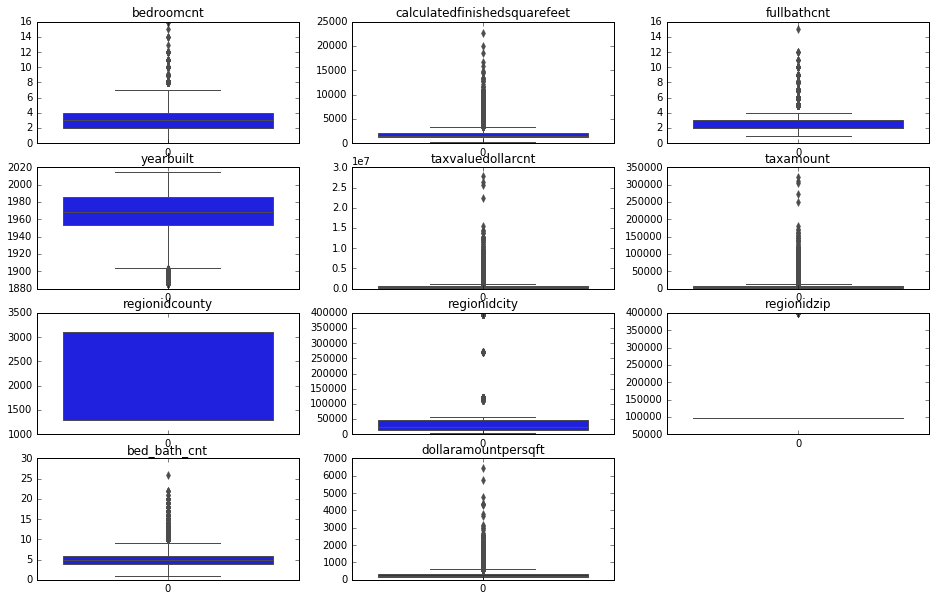

In [77]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['bedroomcnt','calculatedfinishedsquarefeet','fullbathcnt','yearbuilt','taxvaluedollarcnt','taxamount','regionidcounty','regionidcity','regionidzip','bed_bath_cnt','dollaramountpersqft']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = x_vars_cols[col]
    plt.subplot(4, 3, plot_number)
    plt.title(col)
#     ax.set(xscale='log', yscale='log')
    sns.boxplot(data=series)
    hspace = 0.2


## Distribution Plots

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


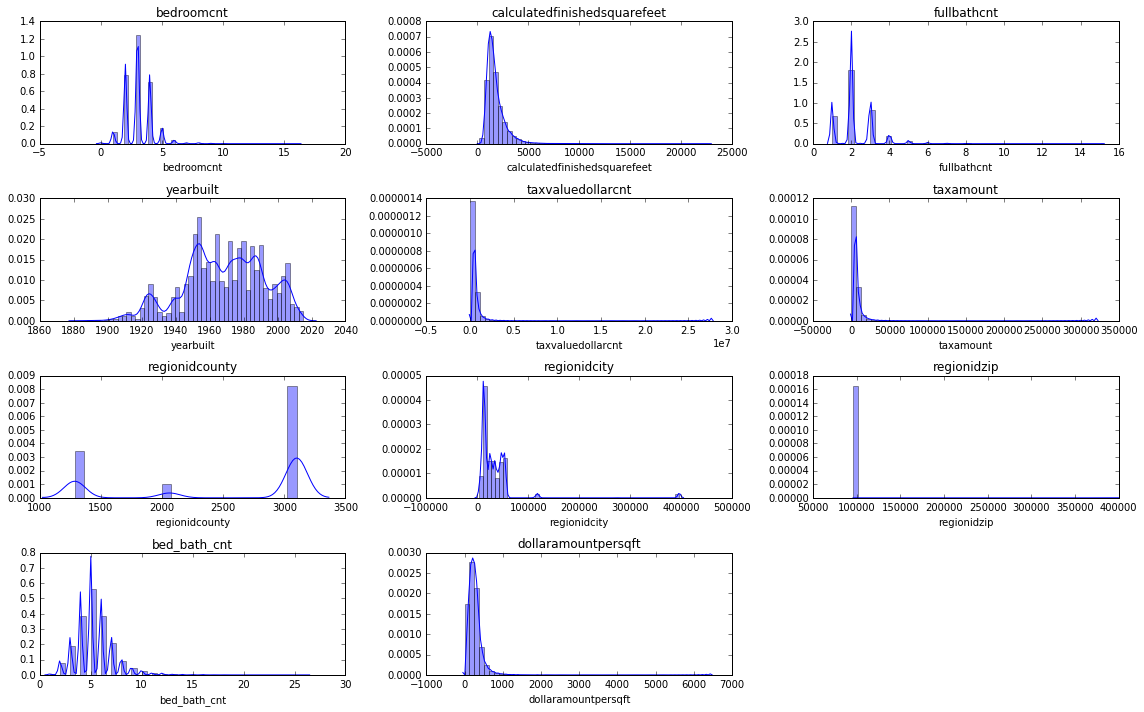

In [78]:
import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

for i, col in enumerate(['bedroomcnt','calculatedfinishedsquarefeet','fullbathcnt','yearbuilt','taxvaluedollarcnt','taxamount','regionidcounty','regionidcity','regionidzip','bed_bath_cnt','dollaramountpersqft']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = x_vars_cols[col]
    plt.subplot(4, 3, plot_number)
    plt.title(col)
    plt.tight_layout()
    sns.distplot(series)


## Made a new column for the absolute value of the log error

In [79]:
df_cleaned['logerror_abs'] = df_cleaned['logerror'].abs() #produces the absolute value of log error


In [80]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,bed_bath_cnt,dollaramountpersqft,logerror_abs
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,3101.0,12447.0,96370.0,5.0,213.877672,0.0276
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,1286.0,32380.0,96962.0,7.0,258.740168,0.1684
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,3101.0,47019.0,96293.0,5.0,54.084799,0.0040
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,3101.0,12447.0,96222.0,4.0,291.871275,0.0218
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,1286.0,17686.0,96961.0,6.0,190.342094,0.0050
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,3101.0,29712.0,96109.0,8.0,798.158135,0.2705
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,3101.0,24174.0,96091.0,3.0,85.983809,0.0440
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,2061.0,13150.0,97101.0,5.0,173.567782,0.1638
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,1286.0,25459.0,96987.0,3.0,263.899497,0.0030
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,1286.0,46098.0,96963.0,4.0,151.555556,0.0843


In [36]:
#df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))) # normalizes the data in every colum

<h1>Exploration</h1>

In [81]:
# test_train_split
X = df_cleaned.drop(['parcelid'], axis=1)
y = df_cleaned[['logerror']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [82]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [83]:
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['logerror', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'regionidcounty', 'regionidcity', 'regionidzip', 'bed_bath_cnt', 'dollaramountpersqft', 'logerror_abs', 'logerror']
Train dimensions (rows, columns): (69645, 14)


In [84]:
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['logerror', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'regionidcounty', 'regionidcity', 'regionidzip', 'bed_bath_cnt', 'dollaramountpersqft', 'logerror_abs', 'logerror']
Test dimensions (rows, columns): (17412, 14)


In [85]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


## Jointplots

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

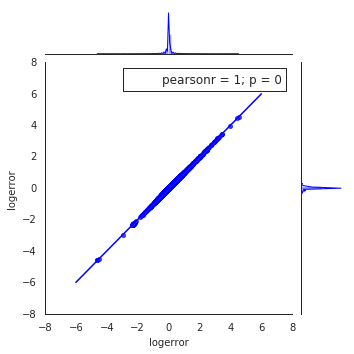

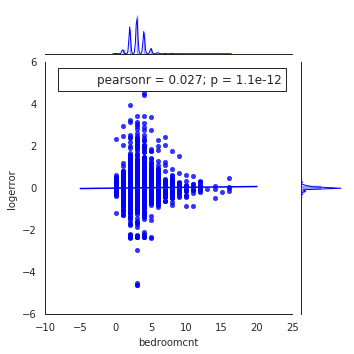

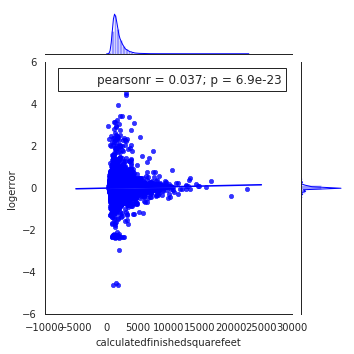

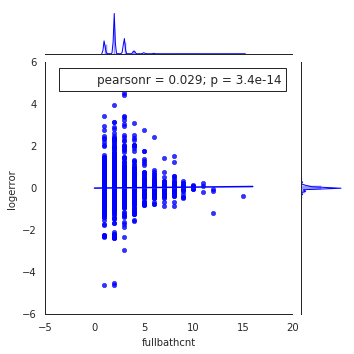

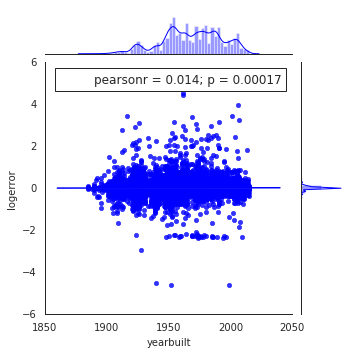

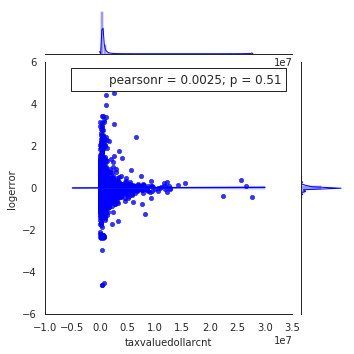

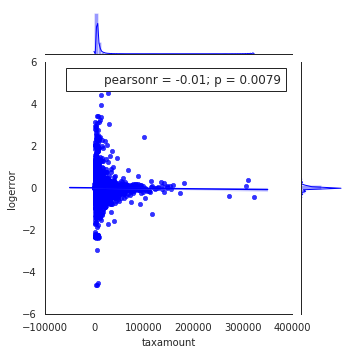

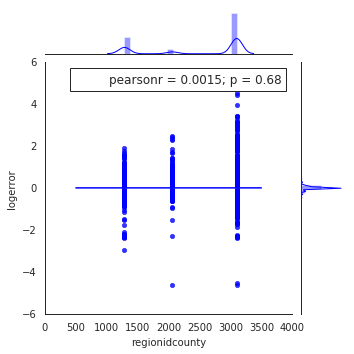

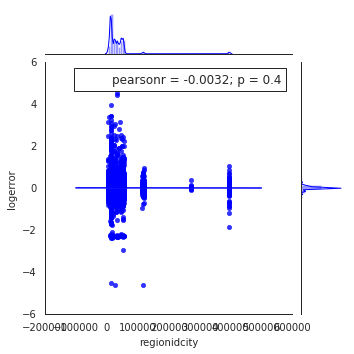

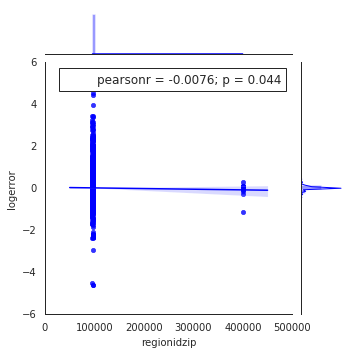

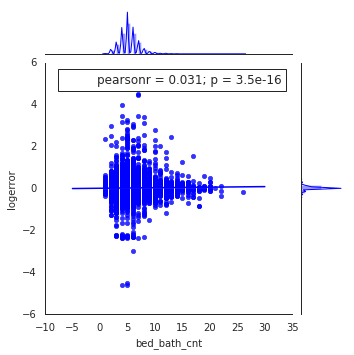

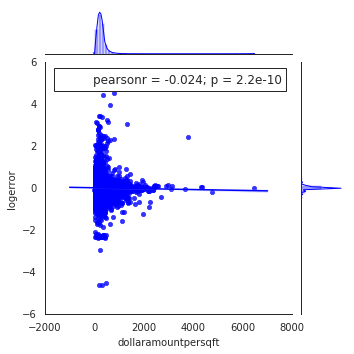

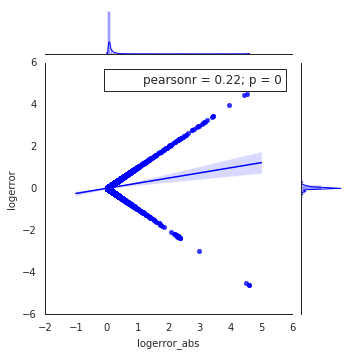

In [86]:
for col in X_train:
    with sns.axes_style('white'):
        j = sns.jointplot(col, 'logerror', data=X_train, kind='reg', height=5);
        j.annotate(stats.pearsonr)
plt.show()

### seaborn's PairGrid() 

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x1c257bd940> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


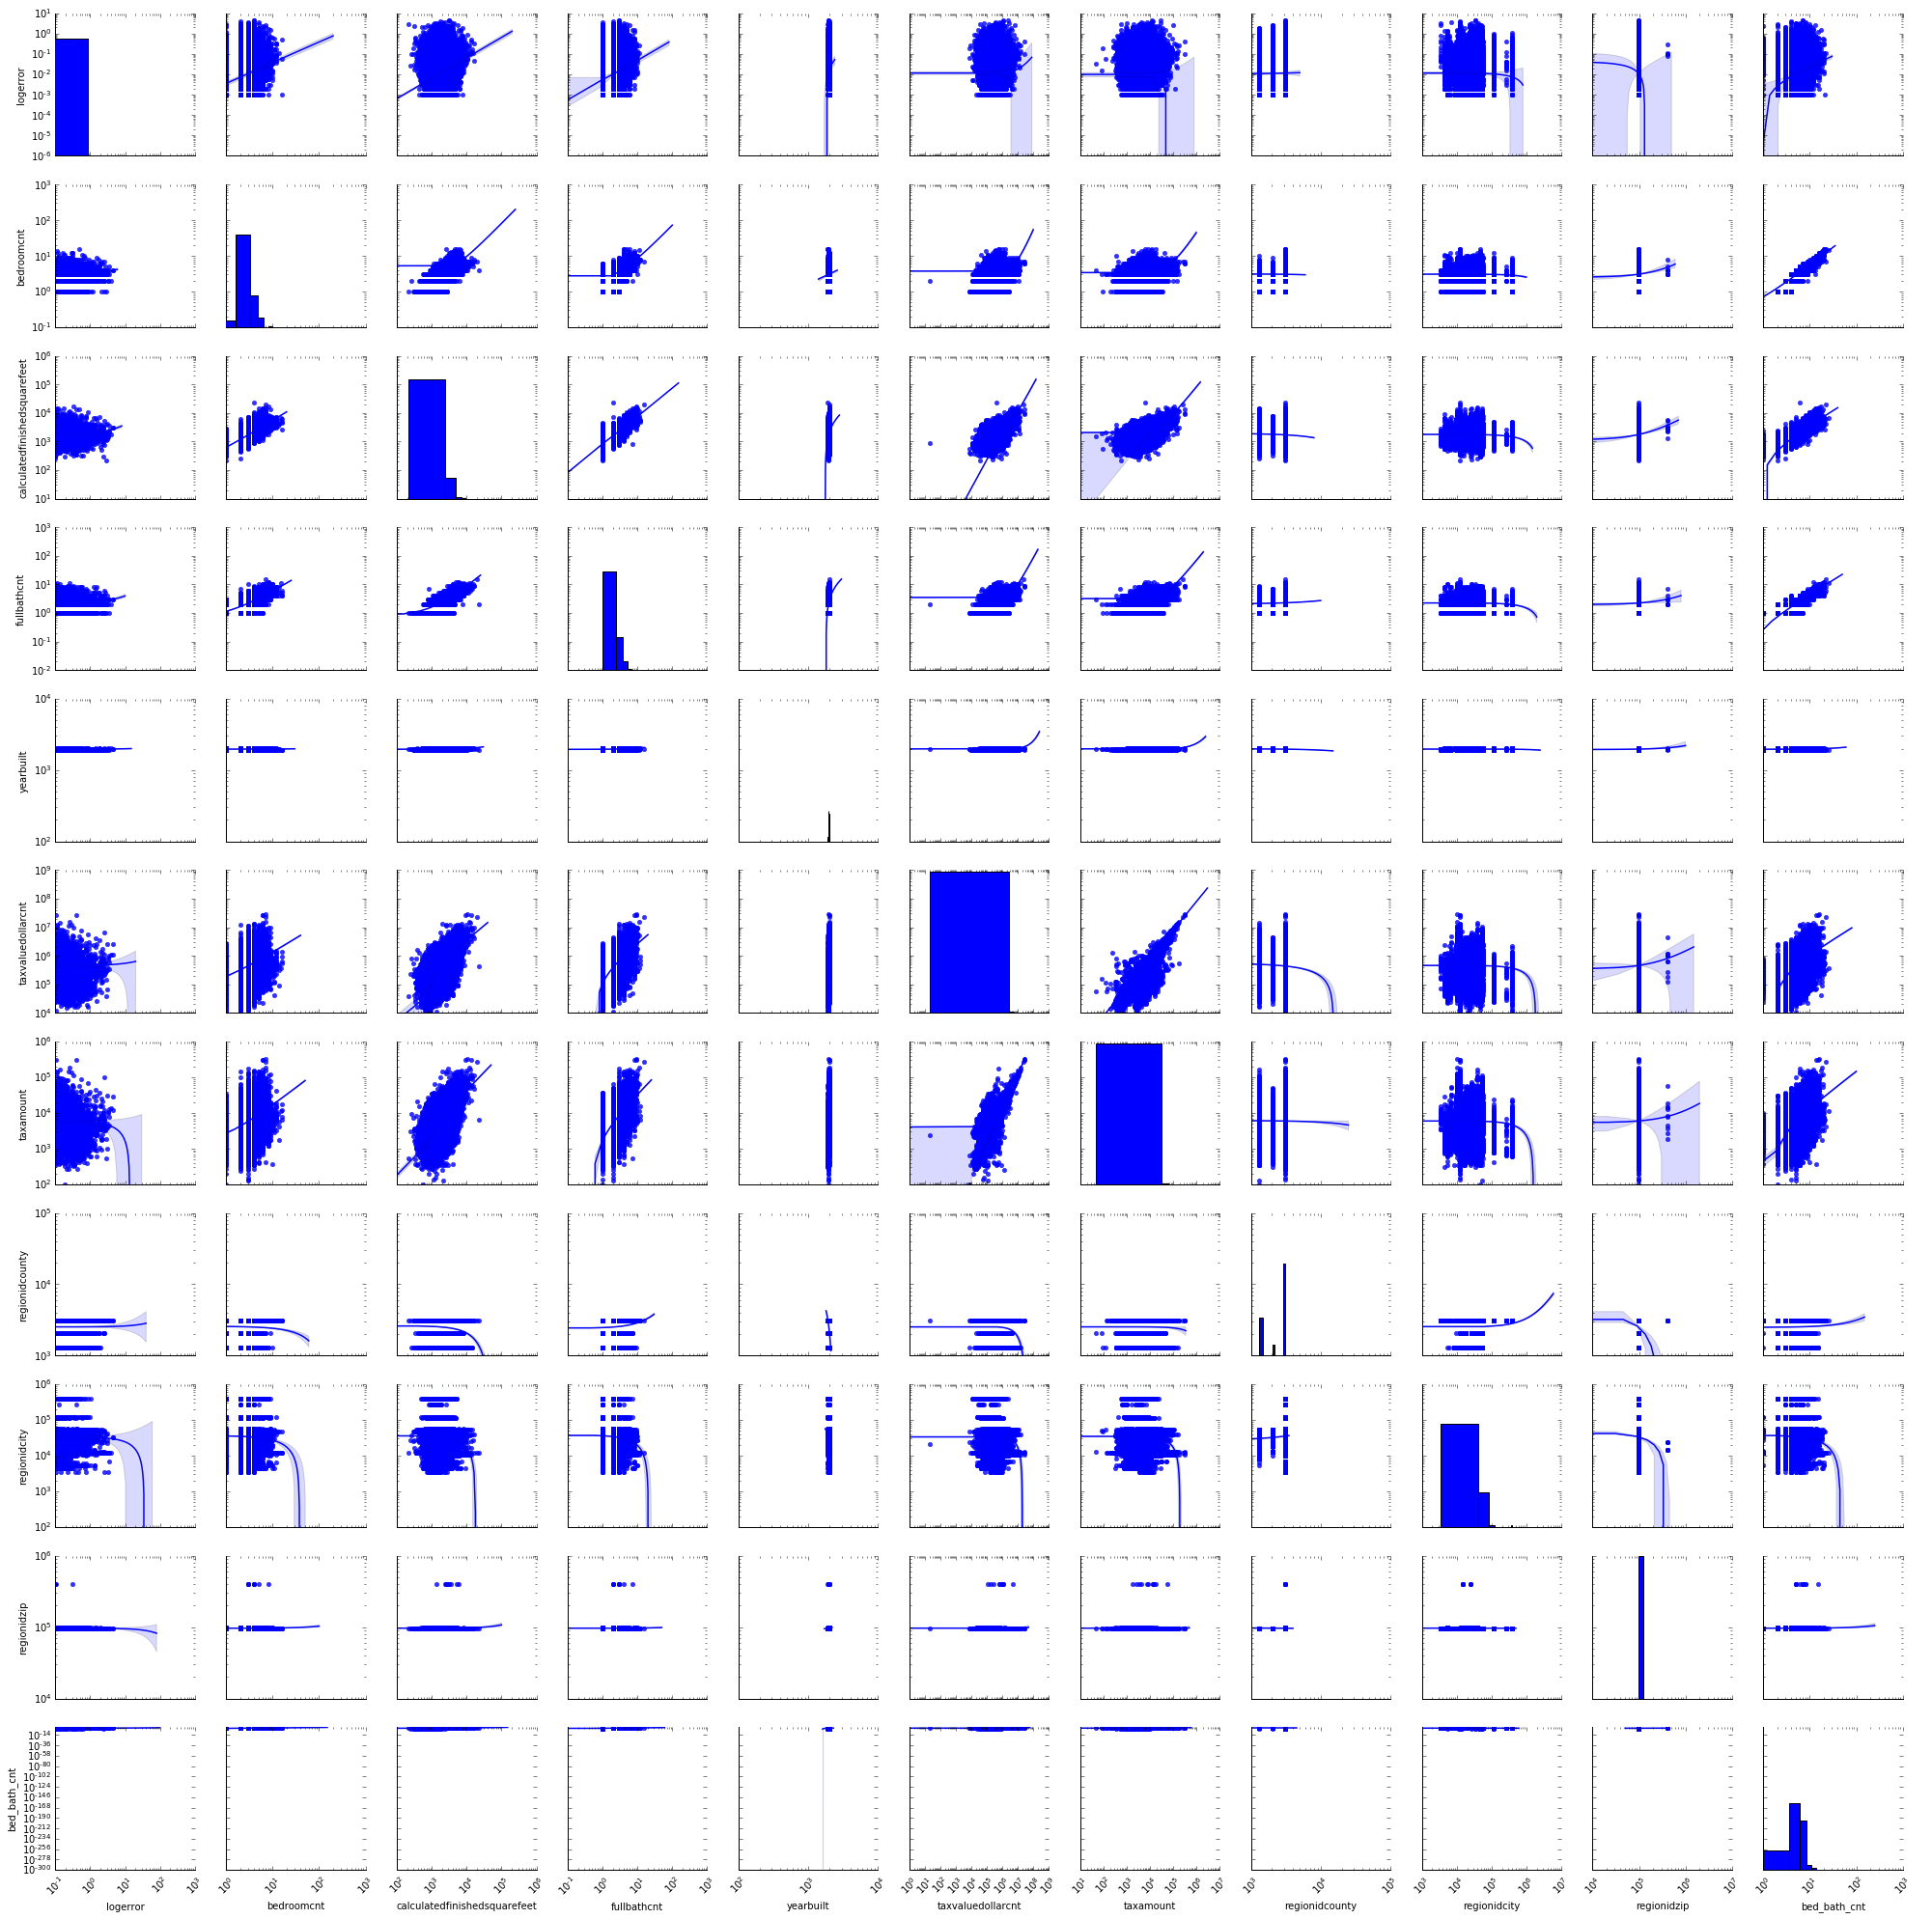

In [38]:
g = sns.PairGrid(X_train)
g.map_offdiag(sns.regplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat:
    ax.set(xscale='log', yscale='log')
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend()
g.set(alpha=0.5)

In [39]:
# g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin") 
# g.map_upper(sns.regplot) 
# g.map_lower(sns.residplot) 
# g.map_diag(plt.hist) 
# for ax in g.axes.flat: 
#     plt.setp(ax.get_xticklabels(), rotation=45) 
# g.add_legend() 
# g.set(alpha=0.5)

#### Create a heatmap of the correlation between each variable pair.

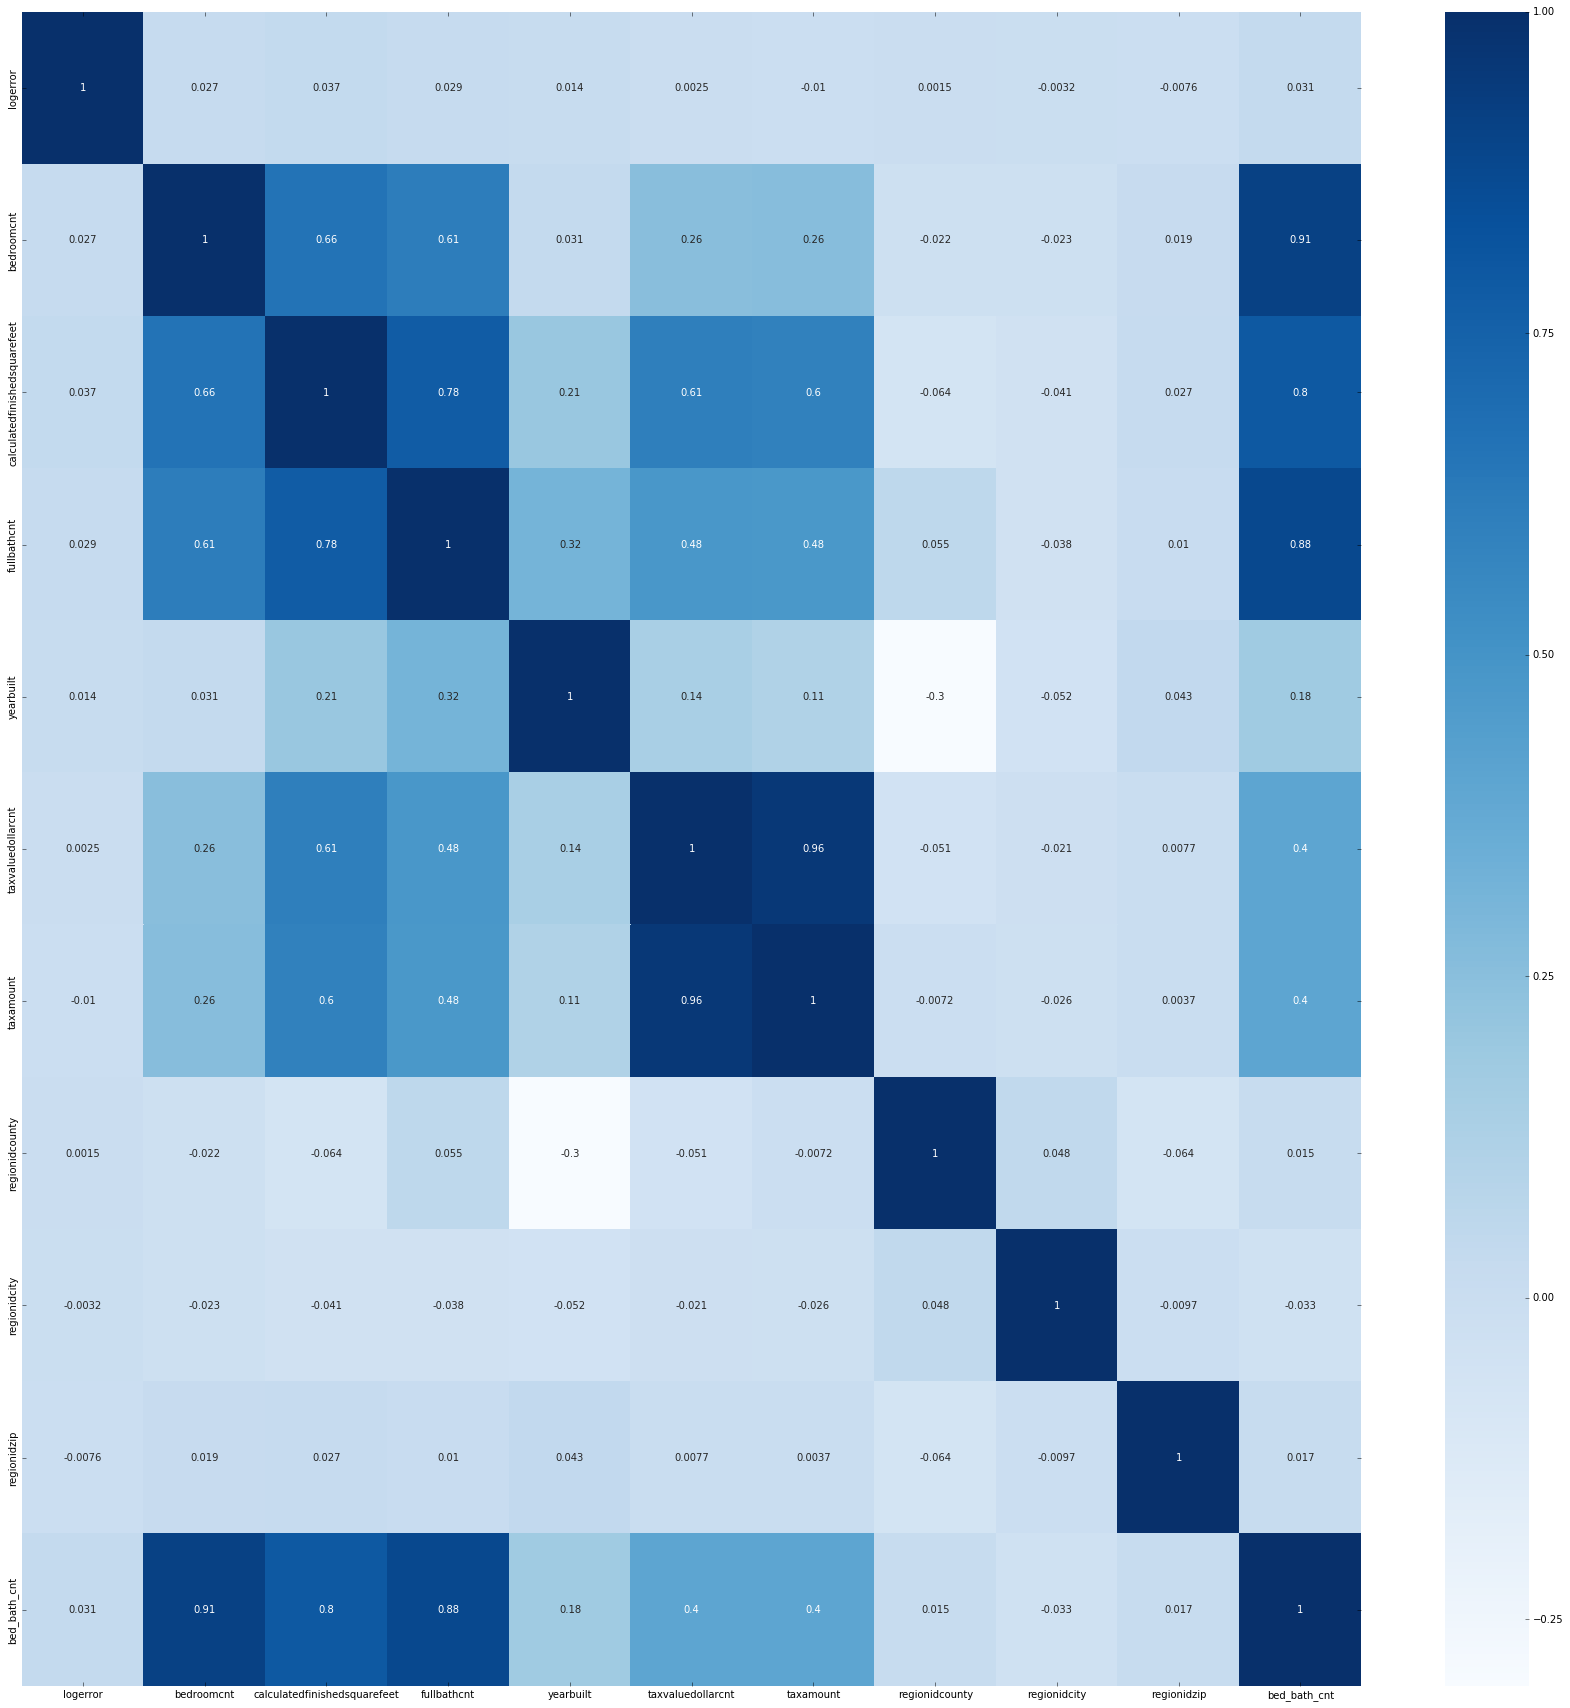

In [40]:
plt.figure(figsize=(30, 30))

sns.heatmap(X_train.corr(),cmap='Blues', annot=True)


#### Summarize your conclusions from all of these steps.  

### When analyzing the variables relationships between the logerror and the other variables, there is no strong relationship between any single variable and the logerror. The biggest correlation is yearbuilt at 0.03.
### There are some expected relationships between variables like square footage and bedroom count. But this is not useful.

In [89]:
x_cols = [col for col in train.columns if col not in ['logerror','logerror_abs']]

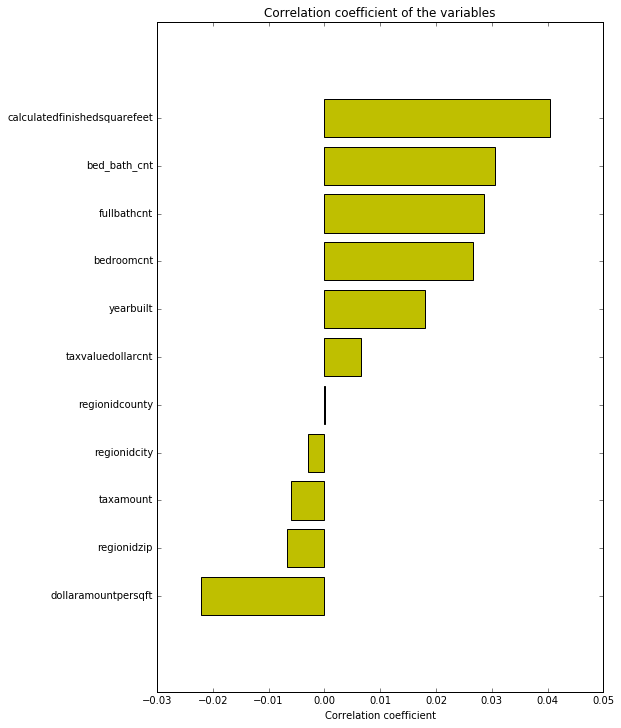

In [90]:
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_cleaned[col].values, df_cleaned.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(8,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

#### Summarize your conclusions from all of these steps.  

### The calculatedfinishedsquarefeet variable has the strongest correlations with the logerror.


#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [91]:
df_3_bd = X_train[X_train['bedroomcnt']==3.0]

In [92]:
df_5_bd = X_train[X_train['bedroomcnt']>5.0]

In [93]:
df_3_bd

,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,bed_bath_cnt,dollaramountpersqft,logerror_abs
90250,0.0421,3.0,1649.0,2.0,1962.0,257206.0,3148.18,1286.0,25218.0,96965.0,5.0,155.976956,0.0421
55296,-0.0651,3.0,1105.0,1.0,1949.0,343687.0,5521.51,3101.0,396556.0,96174.0,4.0,311.028959,0.0651
58764,-0.0060,3.0,1947.0,2.0,1978.0,342756.0,3919.56,2061.0,34278.0,96383.0,5.0,176.043143,0.0060
45193,-0.0471,3.0,1564.0,2.0,1987.0,545361.0,5760.46,1286.0,32380.0,96962.0,5.0,348.696292,0.0471
26121,-0.0492,3.0,1395.0,2.0,2005.0,418000.0,5205.42,1286.0,27491.0,97016.0,5.0,299.641577,0.0492
64170,0.0020,3.0,1623.0,2.0,2001.0,548319.0,7839.62,1286.0,52835.0,96998.0,5.0,337.842884,0.0020
42275,0.0149,3.0,1143.0,1.0,1947.0,43392.0,1031.76,3101.0,118914.0,96028.0,4.0,37.963255,0.0149
86151,0.0497,3.0,1502.0,2.0,1955.0,351762.0,4595.68,3101.0,24245.0,96473.0,5.0,234.195739,0.0497
88714,-0.0367,3.0,1849.0,2.0,1954.0,79455.0,888.72,2061.0,34543.0,97083.0,5.0,42.971877,0.0367
42534,-0.0090,3.0,1244.0,2.0,1967.0,63824.0,1042.34,1286.0,25218.0,96965.0,5.0,51.305466,0.0090


In [94]:
(df_5_bd)

,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,bed_bath_cnt,dollaramountpersqft,logerror_abs
68812,0.0198,6.0,2575.0,3.0,1973.0,682007.0,7919.50,1286.0,38032.0,96958.0,9.0,264.857087,0.0198
82306,0.0583,6.0,2593.0,4.0,1958.0,314381.0,3861.70,1286.0,10608.0,96180.0,10.0,121.242191,0.0583
61845,-0.0801,6.0,3062.0,3.0,1972.0,1237737.0,13855.42,1286.0,25218.0,96967.0,9.0,404.225016,0.0801
61955,-0.0274,6.0,3228.0,4.0,2005.0,791306.0,12886.04,1286.0,52835.0,96998.0,10.0,245.138166,0.0274
73675,-0.0910,6.0,3934.0,4.0,1935.0,1180000.0,15524.30,3101.0,12447.0,96000.0,10.0,299.949161,0.0910
77072,-0.0020,6.0,6223.0,6.0,1990.0,1178299.0,13459.08,2061.0,42091.0,96342.0,12.0,189.345814,0.0020
50148,0.0431,8.0,3500.0,4.0,1964.0,194452.0,3034.81,3101.0,20008.0,96506.0,12.0,55.557714,0.0431
74248,-0.0141,7.0,4171.0,4.0,1995.0,1002142.0,10788.34,1286.0,33252.0,97067.0,11.0,240.264205,0.0141
28134,0.1748,6.0,10132.0,6.0,2004.0,3059939.0,34869.45,3101.0,24384.0,96505.0,12.0,302.007402,0.1748
80661,0.1017,8.0,3424.0,4.0,1962.0,509317.0,6602.83,3101.0,46298.0,96238.0,12.0,148.749124,0.1017


In [95]:
stats.ttest_ind(df_5_bd['logerror'],df_3_bd['logerror'])

Ttest_indResult(statistic=3.346146823951895, pvalue=0.0008204654623948138)

## The t test shows that the difference between the logerror's of the homes with 3 bdrms and homes with 5+ bdrms is 3.8X different. The p-value is very close to 0, so it is dependable. However, the difference is big.

### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

### Two samples to compare: Home built before 1920 (not inc.) and Homes built after 1920

In [96]:
df_pre_1920 = X_train[X_train['yearbuilt']<1920]

In [97]:
df_post_1920 = X_train[X_train['yearbuilt']>=1920]

In [98]:
df_pre_1920.sort_values(by=['yearbuilt'])

,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidcounty,regionidcity,regionidzip,bed_bath_cnt,dollaramountpersqft,logerror_abs
34325,0.0478,2.0,756.0,1.0,1885.0,235614.0,3069.50,3101.0,20008.0,96508.0,3.0,311.658730,0.0478
12855,0.0000,2.0,1465.0,1.0,1885.0,37273.0,631.00,3101.0,11626.0,96486.0,3.0,25.442321,0.0000
38339,-0.0305,5.0,3340.0,1.0,1885.0,708373.0,8478.10,3101.0,47019.0,96292.0,6.0,212.087725,0.0305
57017,0.1222,6.0,2953.0,3.0,1885.0,529254.0,6899.32,3101.0,12447.0,95996.0,9.0,179.225872,0.1222
39187,0.0325,2.0,736.0,1.0,1885.0,233500.0,2123.25,3101.0,12447.0,95992.0,3.0,317.255435,0.0325
80820,-0.0010,2.0,920.0,1.0,1886.0,31370.0,421.90,3101.0,12447.0,96221.0,3.0,34.097826,0.0010
10374,-0.0408,5.0,2886.0,3.0,1888.0,912000.0,12156.98,3101.0,32923.0,96273.0,8.0,316.008316,0.0408
14177,0.0354,4.0,1544.0,1.0,1890.0,345772.0,4221.48,3101.0,12447.0,96221.0,5.0,223.945596,0.0354
51679,-0.1076,3.0,972.0,1.0,1890.0,464483.0,6202.07,3101.0,32923.0,96273.0,4.0,477.863169,0.1076
24742,0.0178,3.0,1469.0,1.0,1890.0,295814.0,3810.92,3101.0,6395.0,96220.0,4.0,201.371001,0.0178


In [99]:
stats.ttest_ind(df_pre_1920['logerror'],df_post_1920['logerror'])

Ttest_indResult(statistic=-0.4448027640520523, pvalue=0.6564636790236369)

## The t test shows that the difference between the logerror's of the homes built before 1920 and after 1920 is -0.44X different, which means they are similar. The p-value is very close to 0, so it is dependable.

In [100]:
df_pre_1920.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 78098 to 11851
Data columns (total 13 columns):
logerror                        1431 non-null float64
bedroomcnt                      1431 non-null float64
calculatedfinishedsquarefeet    1431 non-null float64
fullbathcnt                     1431 non-null float64
yearbuilt                       1431 non-null float64
taxvaluedollarcnt               1431 non-null float64
taxamount                       1431 non-null float64
regionidcounty                  1431 non-null float64
regionidcity                    1431 non-null float64
regionidzip                     1431 non-null float64
bed_bath_cnt                    1431 non-null float64
dollaramountpersqft             1431 non-null float64
logerror_abs                    1431 non-null float64
dtypes: float64(13)
memory usage: 156.5 KB


In [101]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69645 entries, 29097 to 80637
Data columns (total 1 columns):
logerror    69645 non-null float64
dtypes: float64(1)
memory usage: 1.1 MB


<h1>Modeling</h1>
<h2>Feature Engineering & Selection</h2>

#### Combine fullbathcnt and bedroomcnt = bedandbathcnt


#### The OLS summary shows that all of the variables except bed_bath_cnt, regionidzip, and tax amount have low t-test results.


In [54]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.844e+29
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:34:20   Log-Likelihood:             2.0677e+06
No. Observations:               69645   AIC:                        -4.135e+06
Df Residuals:                   69635   BIC:                        -4.135e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
logerror                         1.0000    7.4e-16   1.35e+15      0.000       1.000       1.000
bedroomcnt                   -1.728e-11   1.31e-16  -1.31e+05      0.000   -1.73e-11   -1.73e-11
calculatedfinishedsquarefeet -1.697e-18    2.5e-19     -6.785      0.000   -2.19e-18   -1.21e-18
fullbathcnt                  -1.728e-11   1.55e-16  -1.12e+05      0.000   -1.73e-11   -1.73e-11
yearbuilt                    -9.173e-17   1.48e-18    -61.926      0.000   -9.46e-17   -8.88e-17
taxvaluedollarcnt            -2.249e-20   7.31e-22    -30.771      0.000   -2.39e-20   -2.11e-20
taxamount                    -1.126e-18    5.9e-20    -19.080      0.000   -1.24e-18   -1.01e-18
regionidcounty                1.489e-17   1.48e-19    100.563      0.000    1.46e-17    1.52e-17
regionidcity                  8.965e-20   2.49e-21     35.968      0.000    8.48e-20    9.45e-20
regionidzip                   1.471e-18   2.98e-20     49.301      0.000    1.41e-18    1.53e-18
bed_bath_cnt                  1.728e-11   7.47e-17   2.32e+05      0.000    1.73e-11    1.73e-11
==============================================================================
Omnibus:                    75770.382   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49871498.836
Skew:                           4.789   Prob(JB):                         0.00
Kurtosis:                     133.745   Cond. No.                     1.33e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Summarize conclusions:

#### I will compare two measures of the size of the property: the bed_bath_cnt variable that I created vs calculatedfinishedsquarefeet.

#### I will compare the taxamount to the taxvalueassessed.


#### I will compare the correlation between different groups of homes built in different times.


#### I will examine other geographical variables not yet examined.

##<s> I will compare the regionidzip to a latitude, longitude variable.

## In all of these comparisons I will analyze which measure perform WORSE. And then recommend dropping or additionally engineering those POOR PERFOMING variables.

<h1>Modeling</h1>

### Create Linear Regression Model Objects


In [55]:
# Create linear regression objects for SIZE FEATURES;
# lm1: bed_bath_cnt ONLY
# lm2: calculatedfinishedsquarefeet ONLY
# lm3: both bed_bath_cnt AND calculatedfinishedsquarefeet
lm1_size = LinearRegression()
lm2_size = LinearRegression()
lm3_size = LinearRegression()

In [56]:
# FIT/TRAIN THE MODEL
lm1_size.fit(X_train[['bed_bath_cnt']], y_train)
lm2_size.fit(X_train[['calculatedfinishedsquarefeet']], y_train)
lm3_size.fit(X_train[['bed_bath_cnt', 'calculatedfinishedsquarefeet']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
print('Univariate - bed_bath_cnt ONLY: logerror = b + m * bed_bath_cnt')
print('    y-intercept (b): {:5.2f}'.format(lm1_size.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm1_size.coef_[0][0]))
print()
print('Univariate - calculatedfinishedsquarefeet ONLY: logerror = b + m * calculatedfinishedsquarefeet')
print('    y-intercept (b): {:5.2f}'.format(lm2_size.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm2_size.coef_[0][0]))
print()
print('Multivariate - bed_bath_cnt AND calculatedfinishedsquarefeet: logerror = b + m1 * bed_bath_cnt + m2 * calculatedfinishedsquarefeet')
print('    y-intercept  (b): {:5.2f}'.format(lm3_size.intercept_[0]))
print('    coefficient (m1): {:5.2f}'.format(lm3_size.coef_[0][0]))
print('    coefficient (m2): {:5.2f}'.format(lm3_size.coef_[0][1]))

Univariate - bed_bath_cnt ONLY: logerror = b + m * bed_bath_cnt
    y-intercept (b): -0.00
    coefficient (m):  0.00

Univariate - calculatedfinishedsquarefeet ONLY: logerror = b + m * calculatedfinishedsquarefeet
    y-intercept (b): -0.00
    coefficient (m):  0.00

Multivariate - bed_bath_cnt AND calculatedfinishedsquarefeet: logerror = b + m1 * bed_bath_cnt + m2 * calculatedfinishedsquarefeet
    y-intercept  (b): -0.00
    coefficient (m1):  0.00
    coefficient (m2):  0.00


In [58]:
y_pred_lm1_size = lm1_size.predict(X_train[['bed_bath_cnt']])
y_pred_lm2_size = lm2_size.predict(X_train[['calculatedfinishedsquarefeet']])
y_pred_lm3_size = lm3_size.predict(X_train[['bed_bath_cnt','calculatedfinishedsquarefeet']])


In [59]:
len(y_pred_lm1_size)

69645

In [60]:
# Create linear regression objects for PRICE FEATURES;
# lm1: taxvaluedollarcnt ONLY
# lm2: taxamount ONLY
# lm3: both taxvaluedollarcnt AND taxamount
lm1_price = LinearRegression()
lm2_price = LinearRegression()
lm3_price = LinearRegression()

In [61]:
# FIT/TRAIN THE MODEL
lm1_price.fit(X_train[['taxvaluedollarcnt']], y_train)
lm2_price.fit(X_train[['taxamount']], y_train)
lm3_price.fit(X_train[['taxvaluedollarcnt', 'taxamount']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print('Univariate - taxvaluedollarcnt ONLY: logerror = b + m * taxvaluedollarcnt')
print('    y-intercept (b): {:5.2f}'.format(lm1_price.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm1_price.coef_[0][0]))
print()
print('Univariate - taxamount ONLY: logerror = b + m * taxamount')
print('    y-intercept (b): {:5.2f}'.format(lm2_price.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm2_price.coef_[0][0]))
print()
print('Multivariate - taxvaluedollarcnt AND taxamount: logerror = b + m1 * taxvaluedollarcnt + m2 * taxamount')
print('    y-intercept  (b): {:5.2f}'.format(lm3_price.intercept_[0]))
print('    coefficient (m1): {:5.2f}'.format(lm3_price.coef_[0][0]))
print('    coefficient (m2): {:5.2f}'.format(lm3_price.coef_[0][1]))

Univariate - taxvaluedollarcnt ONLY: logerror = b + m * taxvaluedollarcnt
    y-intercept (b):  0.01
    coefficient (m):  0.00

Univariate - taxamount ONLY: logerror = b + m * taxamount
    y-intercept (b):  0.01
    coefficient (m): -0.00

Multivariate - taxvaluedollarcnt AND taxamount: logerror = b + m1 * taxvaluedollarcnt + m2 * taxamount
    y-intercept  (b):  0.01
    coefficient (m1):  0.00
    coefficient (m2): -0.00


In [63]:
y_pred_lm1_price = lm1_price.predict(X_train[['taxvaluedollarcnt']])
y_pred_lm2_price = lm2_price.predict(X_train[['taxamount']])
y_pred_lm3_price = lm3_price.predict(X_train[['taxvaluedollarcnt','taxamount']])


In [64]:
# Create linear regression objects for GEOGRAPHIC/LOCATION FEATURES;
# lm1: 'regionidcounty' ONLY
# lm2: 'regionidcity' ONLY
# lm3: 'regionidzip' ONLY

lm1_loc = LinearRegression()
lm2_loc = LinearRegression()
lm3_loc = LinearRegression()

In [65]:
# FIT/TRAIN THE MODEL

lm1_loc.fit(X_train[['regionidcounty']], y_train)
lm2_loc.fit(X_train[['regionidcity']], y_train)
lm3_loc.fit(X_train[['regionidzip']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print('Univariate - regionidcounty ONLY: logerror = b + m * regionidcounty')
print('    y-intercept (b): {:5.2f}'.format(lm1_loc.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm1_loc.coef_[0][0]))
print()
print('Univariate - regionidcity ONLY: logerror = b + m * regionidcity')
print('    y-intercept (b): {:5.2f}'.format(lm2_loc.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm2_loc.coef_[0][0]))
print()
print('Univariate - regionidzip ONLY: logerror = b + m * regionidzip')
print('    y-intercept (b): {:5.2f}'.format(lm3_loc.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm3_loc.coef_[0][0]))
print()

Univariate - regionidcounty ONLY: logerror = b + m * regionidcounty
    y-intercept (b):  0.01
    coefficient (m):  0.00

Univariate - regionidcity ONLY: logerror = b + m * regionidcity
    y-intercept (b):  0.01
    coefficient (m): -0.00

Univariate - regionidzip ONLY: logerror = b + m * regionidzip
    y-intercept (b):  0.04
    coefficient (m): -0.00



In [67]:
y_pred_lm1_loc = lm1_loc.predict(X_train[['regionidcounty']])
y_pred_lm2_loc = lm2_loc.predict(X_train[['regionidcity']])
y_pred_lm3_loc = lm3_loc.predict(X_train[['regionidzip']])

Text(0.5, 1.0, 'Predicted vs Actual Using Size Variables')

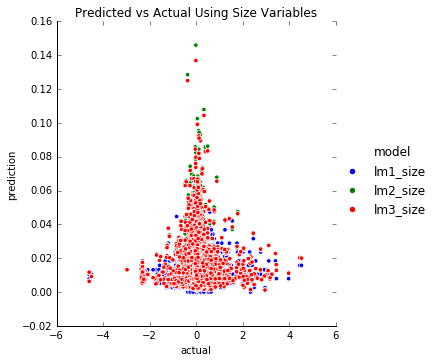

In [68]:
# THE ANALYSIS OF THE SIZE FEATURES

pd.DataFrame({'actual': y_train.logerror,
              'lm1_size': y_pred_lm1_size.ravel(),
              'lm2_size': y_pred_lm2_size.ravel(),
             'lm3_size': y_pred_lm3_size.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.autoscale(enable=True, axis='both', tight=None)
plt.title('Predicted vs Actual Using Size Variables')

In [69]:
mse_lm1_size = mean_squared_error(y_train, y_pred_lm1_size)
print("lm1\n  mse: {:.3}".format(mse_lm1_size)) 

r2_lm1_size = r2_score(y_train, y_pred_lm1_size)
print('  {:.2%} of the variance in the logerror can be explained by the bed_bath_cnt.'.format(r2_lm1_size))

mse_lm2_size = mean_squared_error(y_train, y_pred_lm2_size)
print("lm2\n  mse: {:.3}".format(mse_lm2_size)) 

r2_lm2_size = r2_score(y_train, y_pred_lm2_size)
print('  {:.2%} of the variance in the logerror can be explained by the calculatedfinishedsquarefeet.'.format(r2_lm2_size))

mse_lm3_size = mean_squared_error(y_train, y_pred_lm3_size)
print("lm2\n  mse: {:.3}".format(mse_lm3_size)) 

r2_lm3_size = r2_score(y_train, y_pred_lm3_size)
print('  {:.2%} of the variance in the logerror can be explained by the bed_bath_cnt and calculatedfinishedsquarefeet.'.format(r2_lm3_size))

lm1
  mse: 0.0251
  0.10% of the variance in the logerror can be explained by the bed_bath_cnt.
lm2
  mse: 0.0251
  0.14% of the variance in the logerror can be explained by the calculatedfinishedsquarefeet.
lm2
  mse: 0.0251
  0.14% of the variance in the logerror can be explained by the bed_bath_cnt and calculatedfinishedsquarefeet.


Text(0.5, 1.0, 'Predicted vs Actual Using Price Varibles')

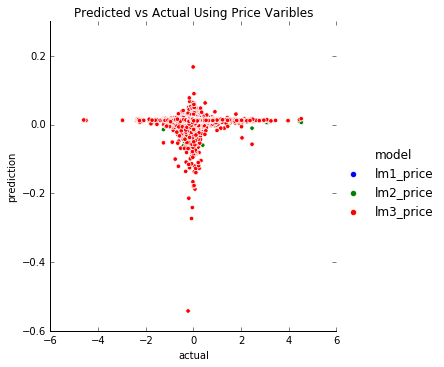

In [70]:
# THE ANALYSIS OF THE PRICE FEATURES

pd.DataFrame({'actual': y_train.logerror,
              'lm1_price': y_pred_lm1_price.ravel(),
              'lm2_price': y_pred_lm2_price.ravel(),
             'lm3_price': y_pred_lm3_price.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.autoscale(enable=True, axis='both', tight=None)
plt.title('Predicted vs Actual Using Price Varibles')

In [72]:
mse_lm1_price = mean_squared_error(y_train, y_pred_lm1_price)
print("lm1\n  mse: {:.3}".format(mse_lm1_size)) 

r2_lm1_price = r2_score(y_train, y_pred_lm1_price)
print('  {:.2%} of the variance in the logerror can be explained by the taxvaluedollarcnt.'.format(r2_lm1_price))

mse_lm2_price = mean_squared_error(y_train, y_pred_lm2_price)
print("lm2\n  mse: {:.3}".format(mse_lm2_price)) 

r2_lm2_price = r2_score(y_train, y_pred_lm2_price)
print('  {:.2%} of the variance in the logerror can be explained by the taxamount.'.format(r2_lm2_price))


mse_lm3_price = mean_squared_error(y_train, y_pred_lm3_price)
print("lm2\n  mse: {:.3}".format(mse_lm3_size)) 

r2_lm3_price = r2_score(y_train, y_pred_lm3_price)
print('  {:.2%} of the variance in the logerror can be explained by the taxvaluedollarcnt and taxamount.'.format(r2_lm3_price))

lm1
  mse: 0.0251
  0.00% of the variance in the logerror can be explained by the taxvaluedollarcnt.
lm2
  mse: 0.0252
  0.01% of the variance in the logerror can be explained by the taxamount.
lm2
  mse: 0.0251
  0.18% of the variance in the logerror can be explained by the taxvaluedollarcnt and taxamount.


In [73]:
len(y_pred_lm2_size)

69645

In [74]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17412 entries, 87544 to 51895
Data columns (total 1 columns):
logerror    17412 non-null float64
dtypes: float64(1)
memory usage: 272.1 KB


Text(0.5, 1.0, 'Predicted vs Actual Using Location Variables')

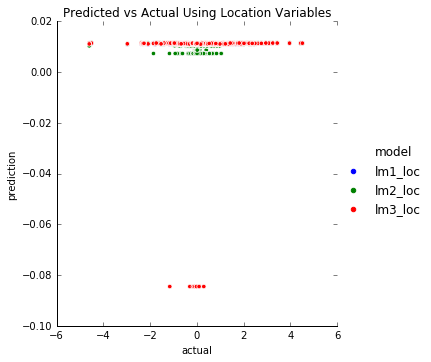

In [75]:
# THE ANALYSIS OF THE LOCATION FEATURES

pd.DataFrame({'actual': y_train.logerror,
              'lm1_loc': y_pred_lm1_loc.ravel(),
              'lm2_loc': y_pred_lm2_loc.ravel(),
             'lm3_loc': y_pred_lm3_loc.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.autoscale(enable=True, axis='both', tight=None)
plt.title('Predicted vs Actual Using Location Variables')

In [76]:
mse_lm1_loc = mean_squared_error(y_train, y_pred_lm1_loc)
print("lm1\n  mse: {:.3}".format(mse_lm1_size)) 

r2_lm1_loc = r2_score(y_train, y_pred_lm1_loc)
print('  {:.2%} of the variance in the logerror can be explained by the regionidcounty.'.format(r2_lm1_loc))

mse_lm2_loc = mean_squared_error(y_train, y_pred_lm2_loc)
print("lm2\n  mse: {:.3}".format(mse_lm2_loc)) 

r2_lm2_loc = r2_score(y_train, y_pred_lm2_loc)
print('  {:.2%} of the variance in the logerror can be explained by the regionidcity.'.format(r2_lm2_loc))


mse_lm3_loc = mean_squared_error(y_train, y_pred_lm3_loc)
print("lm2\n  mse: {:.3}".format(mse_lm3_loc)) 

r2_lm3_loc = r2_score(y_train, y_pred_lm3_loc)
print('  {:.2%} of the variance in the logerror can be explained by the regionidzip.'.format(r2_lm3_loc))

lm1
  mse: 0.0251
  0.00% of the variance in the logerror can be explained by the regionidcounty.
lm2
  mse: 0.0252
  0.00% of the variance in the logerror can be explained by the regionidcity.
lm2
  mse: 0.0252
  0.01% of the variance in the logerror can be explained by the regionidzip.



## Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [77]:
len(y_pred_lm2_size)

69645

In [78]:
len(y_test)

17412

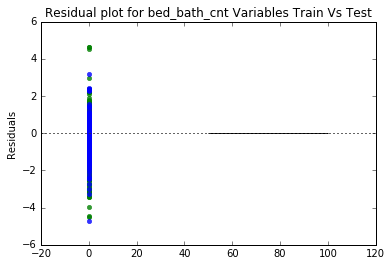

In [79]:
sns.residplot(y_pred_lm1_price, y_pred_lm1_price - y_train, lowess=False, color="g")
sns.residplot(lm1_size.predict(X_test[['bed_bath_cnt']]), lm1_size.predict(X_test[['bed_bath_cnt']]) - y_test, lowess=False, color="b")
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot for bed_bath_cnt Variables Train Vs Test")
plt.ylabel('Residuals')
ax.legend(labels=["train","test"])
# plt.scatter(y_pred_lm2_size, y_pred_lm2_size - y_train, c='g', s=40)
